<a href="https://colab.research.google.com/github/Cassandra-Cruz/Diplomado-Ciencia-Matematica-de-Datos/blob/main/AI_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split #Divide los datos en conjunto de entrenamiento y conjunto de..
from sklearn.preprocessing import StandardScaler  #Normalizar datos
from sklearn.svm import SVR  #Máquinas de vectores
from sklearn.tree import DecisionTreeRegressor, plot_tree #Árboles de regresiones
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score  #Métricas para evaluar el modelo
from sklearn.model_selection import GridSearchCV

In [2]:
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns = california.feature_names)
df['target'] = california.target
df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422

In [3]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [5]:
df.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        target  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.540000   -124.350000      0.149990  
25%        2.429741     33.930000   -121.800000      1.196000  
50%        2.818116     34.260000   -118.490000      1.797000  
75%        3.282261     37.710000   -118.010000      2.647250  
max     1243.333333     41.950000   -114.310000      5.000010

In [6]:
fig = px.scatter_mapbox(df, lat = 'Latitude', lon = 'Longitude', color = 'target', hover_data = ['AveRooms', 'AveBedrms'],
                        mapbox_style = 'open-street-map', zoom = 3.8, title = 'Casas de California - Precio')
fig.update_layout(autosize = True)
fig.show()

In [7]:
fig = px.histogram(df, x = 'target', nbins = 30, title = 'Distribución - Precios de casas')
fig.update_layout(xaxis_title = 'Precio', template = 'plotly_white', bargap = 0.2)
fig.show()

In [20]:
#Matriz de correlación
corr_matrix = df.corr()
fig = px.imshow(corr_matrix, x = corr_matrix.columns, y = corr_matrix.columns, color_continuous_scale = 'RdBu', range_color = [-1,1],
                text_auto = True, aspect = 'auto', title = 'Matriz de correlación')
fig.update(layout_coloraxis_showscale = False)
fig.show()

In [9]:
fig = px.scatter_matrix(df, dimensions = df.columns[:-1], title = 'Pares de variables', height = 800, color = 'target')
fig.show()

In [10]:
X = df.drop('target', axis = 1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 26)

In [22]:
# Máquina de vectores: para ajustar los datos a través de un hiperplano (los escalamos (hacemos normalización) porque el min y max
# en la tabla tienen un rango muy diferente entre variables).
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [12]:
svm = SVR()
svm.fit(X_train_scaled, y_train)

SVR()

In [24]:
# Vamos a hacer una predicción
y_pred_svm = svm.predict(X_test_scaled)
# Error cuadrado
mse_svm = mean_squared_error(y_test, y_pred_svm)
print(f"SVM MSE: {mse_svm:.2f}")
# El valor resultado dice qué tan cercano es la predicción a los datos reales (entre más bajo, mejor el modelo)

SVM MSE: 0.33


In [25]:
svm_r2 = r2_score(y_test, y_pred_svm)
print(f"SVM R^2 Score: {svm_r2:.2f}")

SVM R^2 Score: 0.75


In [ ]:
# Parámetros de la página
#param_grid_svm = {
#    'C':[1.0, 4, 2.718, 882, 0.010],
#    'kernel':['linear', 'poly', 'rbf', 'sigmoid']
#}

In [ ]:
#svm =SVR()
#grid_search_svm = GridSearchCV(estimator = svm, param_grid = param_grid_svm, cv = 5)
#grid_search_svm.fit(X_train_scaled, y_train)

In [ ]:
#best_param_svm = grid_search_svm.best_estimator
#best_param_svm =

In [26]:
#Modelos de regresión
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
# Árbol de deciones (DT)
dt = DecisionTreeRegressor(random_state=26)
dt.fit(X_train_scaled, y_train)

DecisionTreeRegressor(random_state=26)

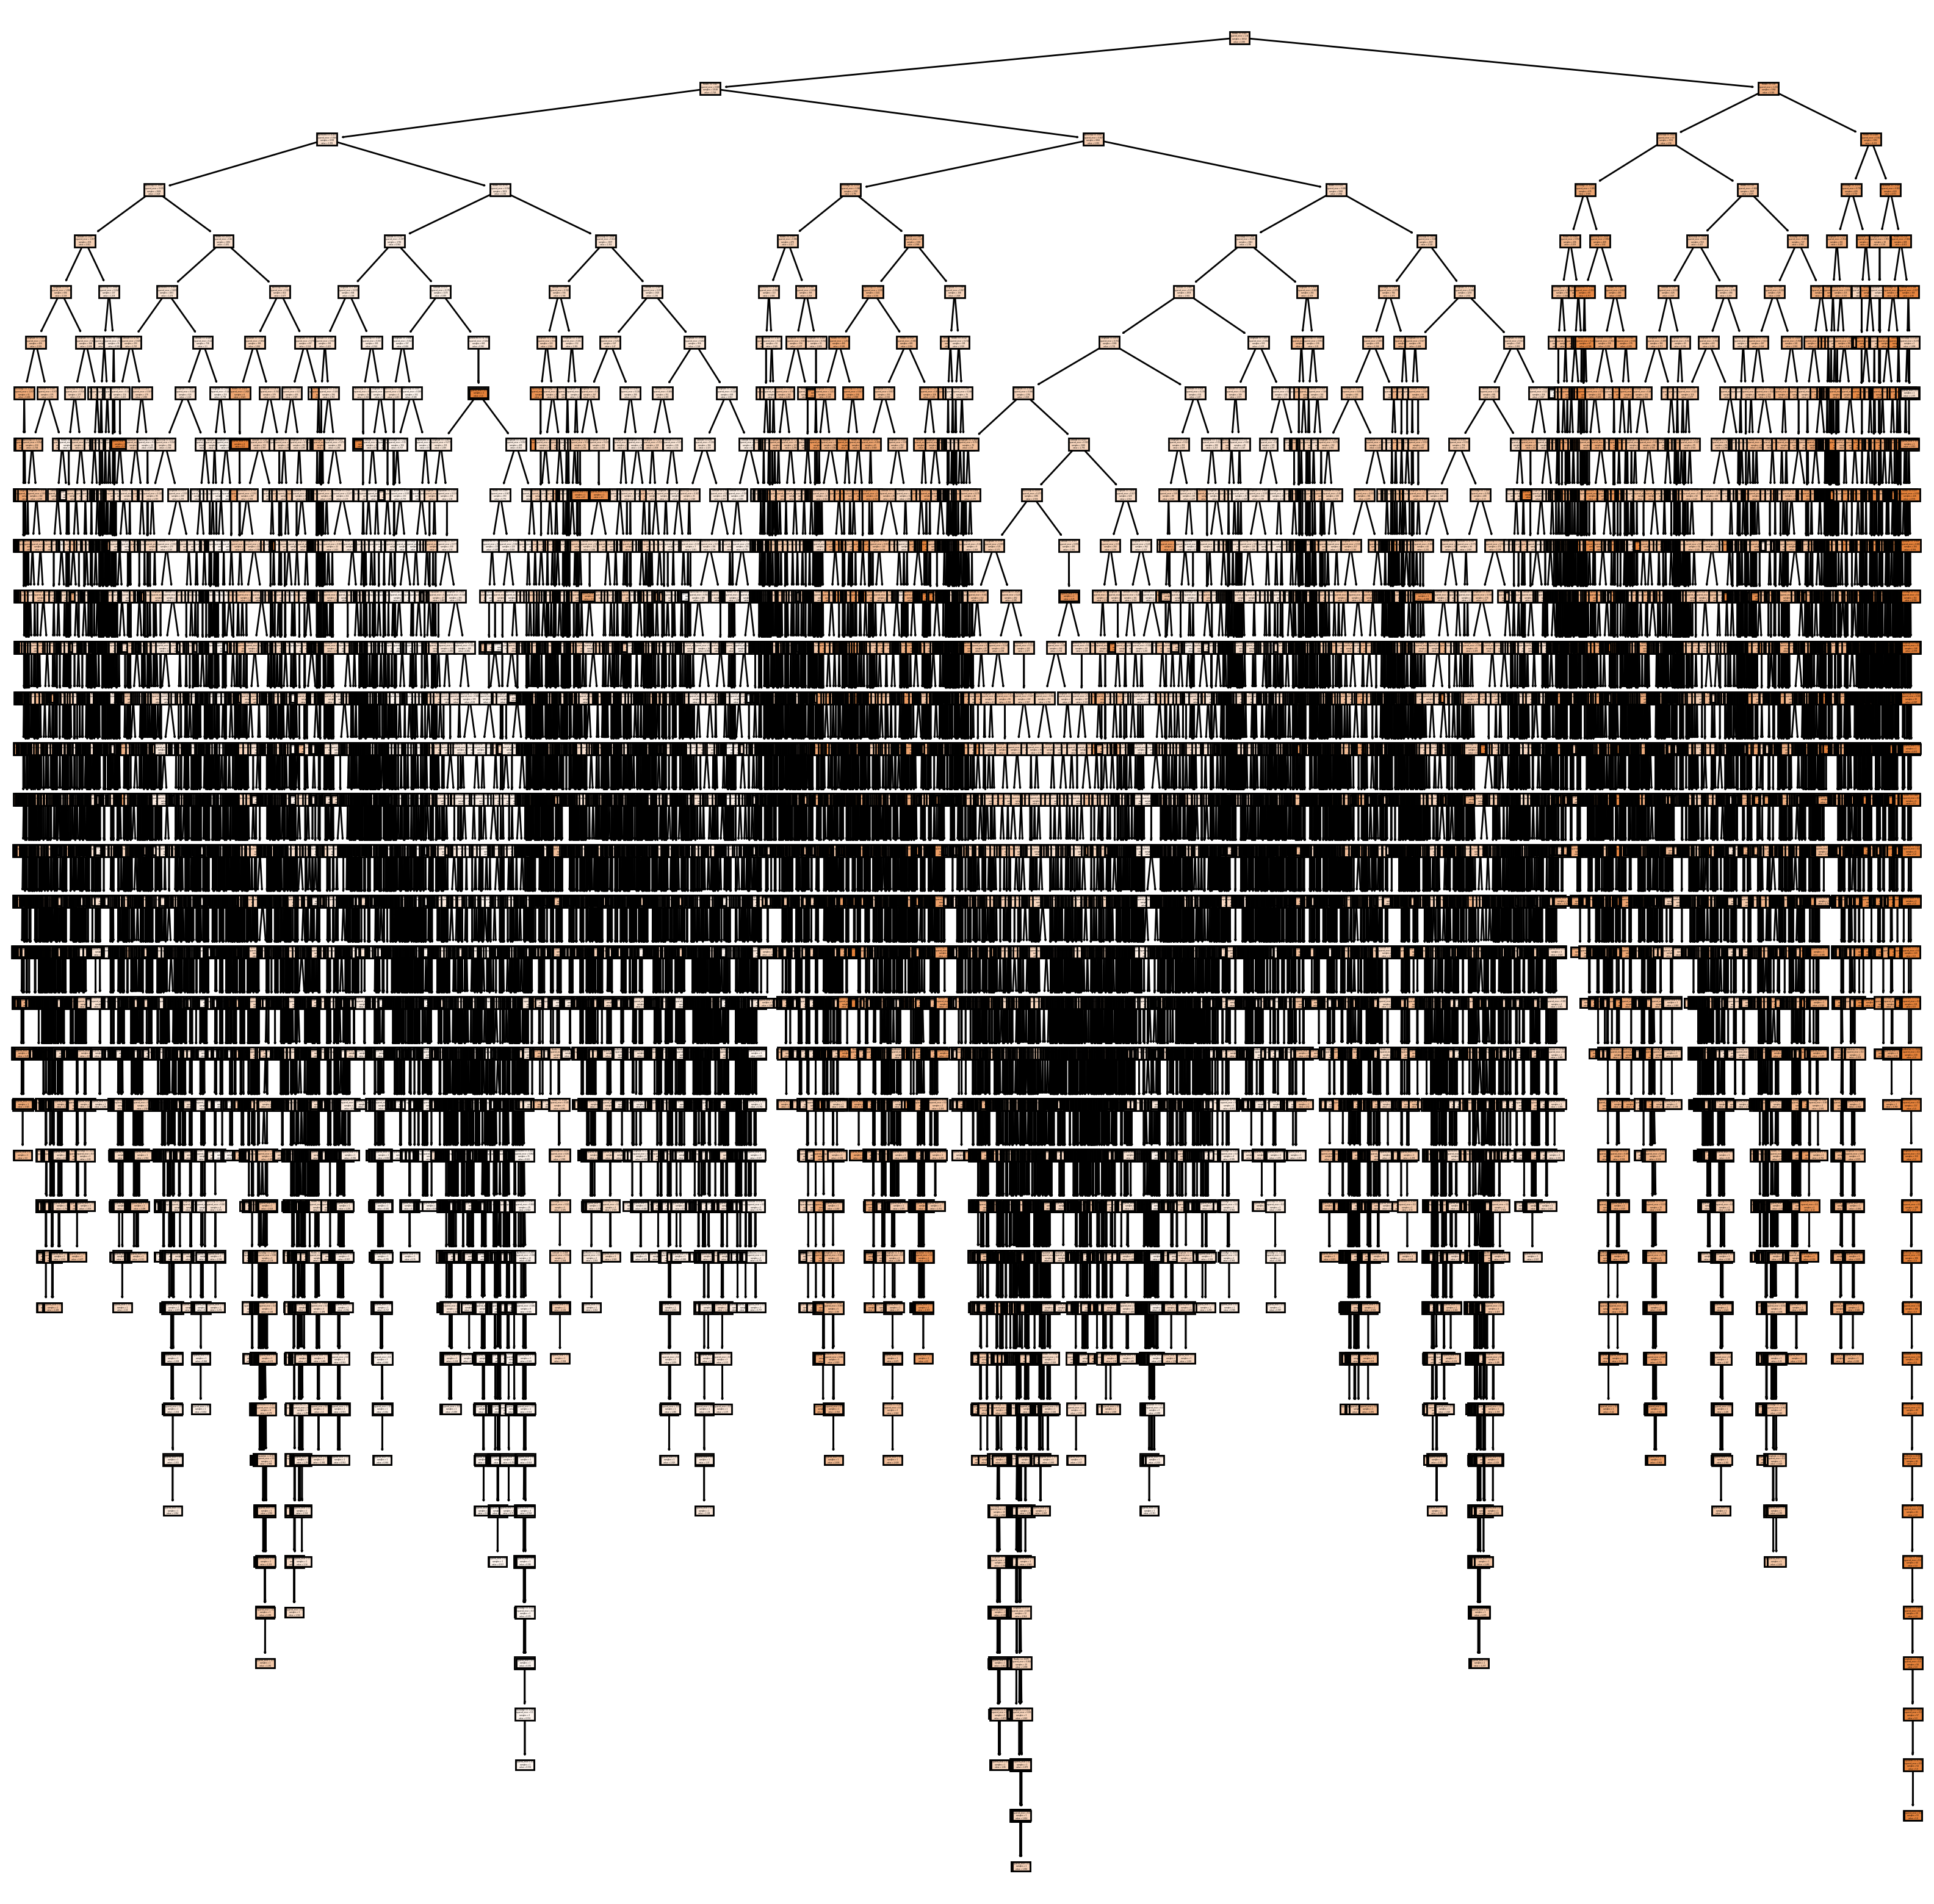

In [18]:
plt.figure(figsize = (20, 20), dpi = 200)
plot_tree(dt, feature_names = df.columns[:-1], filled=True)
plt.show()

In [19]:
# Evaluar el modelo DT
y_pred_dt = dt.predict(X_test_scaled)
mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f"DT MSE: {mse_dt:.2f}")

SVM MSE: 0.33


In [28]:
dt_r2 = r2_score(y_test, y_pred_dt)
print(f"DT R^2 Score: {dt_r2:.2f}")

DT R^2 Score: 0.63


In [33]:
# Bosque Aleatorio
rf = RandomForestRegressor(random_state=26)
rf.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=26)

In [34]:
y_pred_rf = rf.predict(X_test_scaled)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"RF MSE: {mse_rf:.2f}")

RF MSE: 0.23


In [35]:
rf_r2 = r2_score(y_test, y_pred_rf)
print(f"RF R^2 Score: {rf_r2:.2f}")

RF R^2 Score: 0.82


In [36]:
# Resultados
results = pd.DataFrame({
    'Model': ['SVM', 'Decision Tree', 'Random Forest'],
    'MSE': [mse_svm, mse_dt, mse_rf],
    'R^2 Score': [svm_r2, dt_r2, rf_r2]})
results

Model       MSE  R^2 Score
0            SVM  0.329616   0.746096
1  Decision Tree  0.329616   0.634487
2  Random Forest  0.230383   0.822535

In [37]:
# Gráfica
fig = px.bar(results, x = 'Model', y = ['MSE', 'R^2 Score'],
             barmode = 'group', title = 'Model Comparison',
             labels = {'value': 'Score', 'variable': 'Metric'},
             template = 'plotly_white')

fig.show()